# 6 - Matplotlib

**Summary**
> * Your first plots
>> * Plotting a function
>> * Histogram
>> * Dispersion plot
> * Plot customization
>> * Labels
>> * Lines and markers
>> * Legend
> * Multiple plots

Matplotlib tutorials: https://matplotlib.org/3.1.1/tutorials/index.html

## Your first plots

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like MATLAB.

To import the module see below. As for Numpy there is a standard way to call the reference of matplotlib.pyplot in your program, which is `plt`.

In [ ]:
import matplotlib.pyplot as plt  

import numpy as np 

Below we show the three main kind of plot that are typically used: `plot`, `hist`, `scatter`.

### Plotting a function

Let's imagine that we have a physical process that is generating, for example, a damped oscillation. The functional form of it is the following:

In [ ]:
def f(x):
  # Note that numpy knows a good approximation of pi!
  return np.exp(-2*x) * np.cos(6*np.pi*x)

We want to plot this in the interval $[0,1]$.. We can use numpy for generating the x values within this interval:

In [ ]:
n_points = 200

data_x = np.linspace(0, 1, n_points) 

true_y = f(data_x)  # Generating also the sequence of ys from the function

# Note that we are passing the full numpy array of values (data_x) to the function.
# Within the function all the operations are applied element-wise to
# the array. This returns a second numpy array whose elements corresponds
# to the application of f() at each element of data_x

The function `plot(x, y)` interpolates the sequence of points with a line in the x-y plane. If we have enough `n_points` the result is a smooth representation of the function that we want to draw.


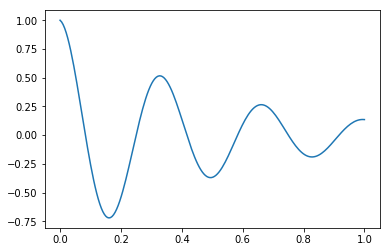

In [ ]:
plt.plot(data_x, true_y)

### Histogram

Let us imagine that the physical process that we want to study is affected by experimental noise.

Here we have gaussian noise with zero mean.

In [ ]:
average, sigma = 0, 0.15
noise = np.random.normal(average, sigma, n_points)

Let's check the shape of this noise. We can easily compute the histogram of the values inside the array. It should look like the usual bell-shaped curve:

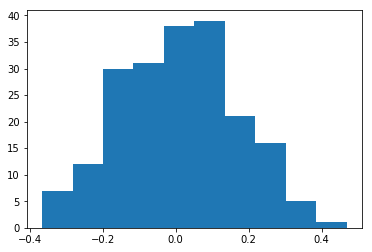

In [ ]:
counts, bins, h = plt.hist(noise)

Note that the histogram returns the list of counts for each bin, `counts`, and the edges of the bins, `bins`.
For example:



In [ ]:
print("There are " + str(counts[4]) + " counts in the interval [" + str(bins[4]) + ", " + str(bins[5]) + "]")

There are 38.0 counts in the interval [-0.03236056070289345, 0.05104705191741116]


### Dispersion plot

The data that we observe from our measurements is therefore the true function `f(x)` plus the `noise`.

In [ ]:
data_y = true_y + noise
# Again the fact that the sum between numpy arrays works element-wise
# allows us to get result without "unpacking" the array.

The result of our measurement is therefore the following dispersion graph, that can be plotte with the method `scatter()`.

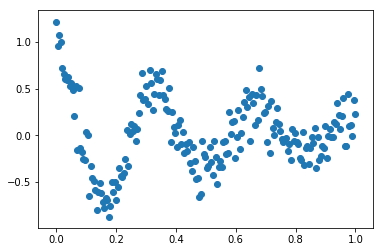

In [ ]:
plt.scatter(data_x, data_y)

## Plot customization

### Labels and range

You are a physiscist! You know that you have to write the quantities your are plotting to make other people understand..

Below it is shown how to put labels on the axis, a title, and how to change th range of x and y to show in the canvas.

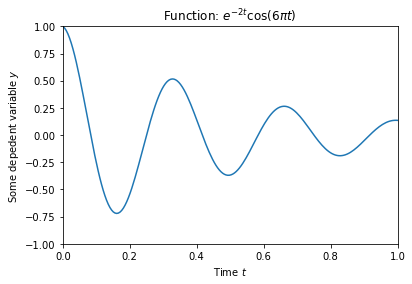

In [ ]:
plt.title('Function: $e^{-2t} \cos(6 \pi t)$')  #  Title
plt.xlabel('Time $t$')  # x label
plt.ylabel('Some depedent variable $y$')  # y label

plt.xlim([0,1])  # Setting the x range
plt.ylim([-1,1])  # Setting the y range

plt.plot(data_x, true_y)

Note that you can use Latex synthax within the dollar symbols!

### Lines and markers

The plotting functions, e.g. plot or scatter, accept a huge number of properties that allows to customize your graph.

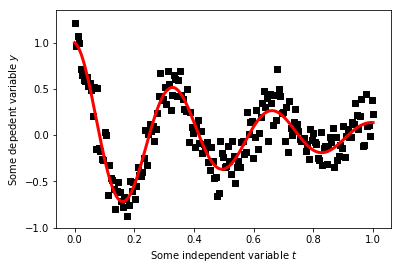

In [ ]:
plt.xlabel('Some independent variable $t$')
plt.ylabel('Some depedent variable $y$')

# Two plotting functions in the same pyplot environment are plotted together in the same canvas
plt.plot(data_x, true_y, linewidth=3, color='red')
plt.scatter(data_x, data_y, marker='s', color='black')

We changed the line witdh (`linewidth` or `ls`), the colors (`color` or `c`), and the marker shape (`marker`). See the official matplotlib documentation to explore other possibilities. For example how to change the line style (`linestyle`) or the marker size (`size`).

### Legend

Multiple elements in the same plot need a legend. It requires a label for each graphic element that you are generating and the method `legend()`.

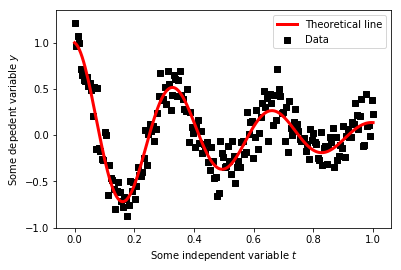

In [ ]:
plt.xlabel('Some independent variable $t$')
plt.ylabel('Some depedent variable $y$')

# Labels inside the graphical objects
plt.plot(data_x, true_y, linewidth=3, color='red', label='Theoretical line')
plt.scatter(data_x, data_y, marker='s', color='black', label='Data')

# Legent keyword
plt.legend()

## Multiple plots

You can draw different plots in the same figure. The easiest way is to:
* declare that you are building a figure with `plt.figure()`.
* Before each sub-plot call the method `plt.subplot(i,j,n)`, where:
> * `i` is the number of plots in rows
> * `j` is the number of plots in columns
> * `n` is the plot number

For example:

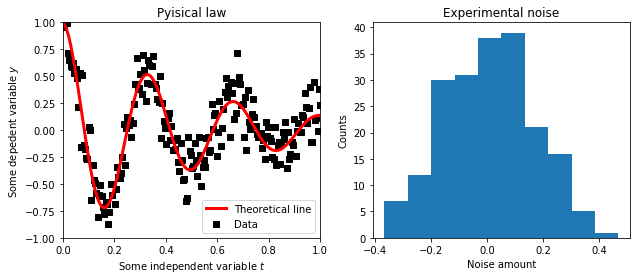

In [ ]:
plt.figure(figsize=(9,4)) # Here you can specify the tot size of the figure

plt.subplot(121)
plt.title('Pyisical law')
plt.xlabel('Some independent variable $t$')
plt.ylabel('Some depedent variable $y$')
plt.xlim([0,1])  # Setting the x range
plt.ylim([-1,1])  # Setting the y range
plt.plot(data_x, true_y, linewidth=3, color='red', label='Theoretical line')
plt.scatter(data_x, data_y, marker='s', color='black', label='Data')
plt.legend()

plt.subplot(122)
plt.title('Experimental noise')
plt.xlabel('Noise amount')
plt.ylabel('Counts')
counts, bins, h = plt.hist(noise)

plt.tight_layout() # This method allows for a better alignments of all the elements